In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'label']
df = pd.read_csv(filepath_or_buffer='./vertebral_column_data/column_3C.dat', header=None, sep=' ', names=header)
print(df.dtypes)

pelvic_incidence              float64
pelvic_tilt                   float64
lumbar_lordosis_angle         float64
sacral_slope                  float64
pelvic_radius                 float64
grade_of_spondylolisthesis    float64
label                          object
dtype: object


In [3]:
x = df.iloc[:, 0:6]
y = df.iloc[:, 6]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [4]:
# inv of regularization constant
c = 3 #(lambda = 1/3)

model = LogisticRegression(C=c, multi_class='ovr')

In [5]:
# 10 fold cross-validation
scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print('10 fold accuracy: {}'.format(scores.mean()*100))

10 fold accuracy: 83.87096774193547


In [6]:
# creation of confusion matrix
model = model.fit(x_train, y_train)
print('Testing accuracy: {}'.format(model.score(x_test, y_test)*100))

predicted = model.predict(x)

cm = metrics.confusion_matrix(y, predicted, labels=['DH', 'NO', 'SL'])
print(cm)

print(metrics.classification_report(y, predicted))

Testing accuracy: 84.67741935483872
[[ 41  17   2]
 [ 17  81   2]
 [  2   3 145]]
             precision    recall  f1-score   support

         DH       0.68      0.68      0.68        60
         NO       0.80      0.81      0.81       100
         SL       0.97      0.97      0.97       150

avg / total       0.86      0.86      0.86       310



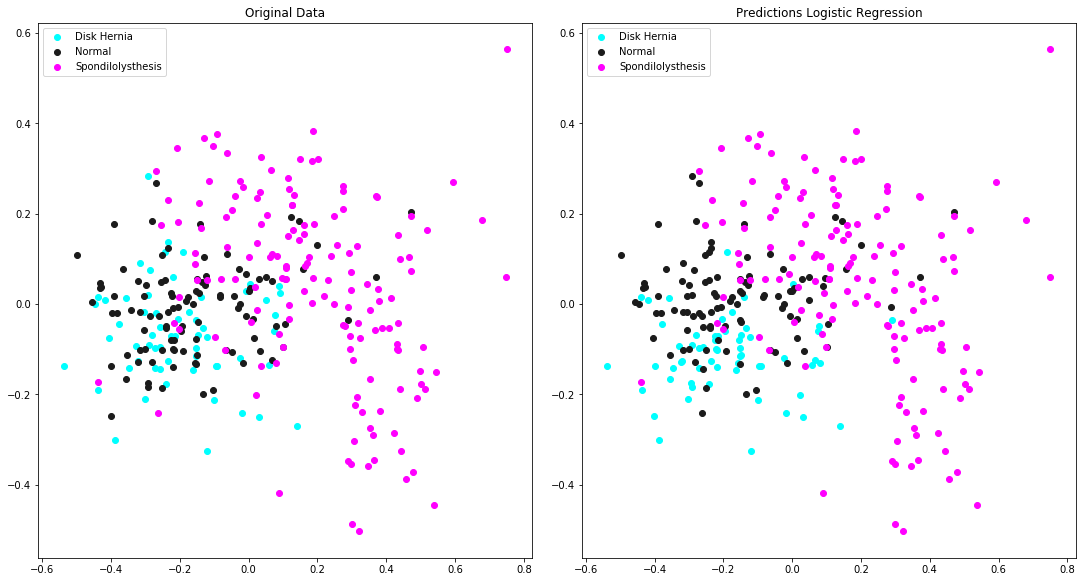

In [11]:
# mean normalization and feature scaling
x_norm = (x - x.mean())/(x.max() - x.min())

# principle component analysis
pca = PCA(n_components=2) #2-dimensional PCA
# print(pca.fit_transform(x_norm))
transformed = pd.DataFrame(pca.fit_transform(x_norm))
predicted = pd.DataFrame(predicted[:]).iloc[:, 0]

# print(transformed[y=='DH'])

# plot
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax1.scatter(transformed[y=='DH'][0], transformed[y=='DH'][1], label='Disk Hernia', c='cyan')
ax1.scatter(transformed[y=='NO'][0], transformed[y=='NO'][1], label='Normal', c='#1B1B1B')
ax1.scatter(transformed[y=='SL'][0], transformed[y=='SL'][1], label='Spondilolysthesis', c='magenta')
ax1.legend()
ax1.set_title('Original Data')

ax2 = fig.add_subplot(122)
ax2.scatter(transformed[predicted=='DH'][0], transformed[predicted=='DH'][1], label='Disk Hernia', c='cyan')
ax2.scatter(transformed[predicted=='NO'][0], transformed[predicted=='NO'][1], label='Normal', c='#1B1B1B')
ax2.scatter(transformed[predicted=='SL'][0], transformed[predicted=='SL'][1], label='Spondilolysthesis', c='magenta')
ax2.legend()
ax2.set_title('Predictions Logistic Regression')

plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2.0)
plt.show()